##### Copyright 2022 The Cirq Developers

In [58]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Hello Qubit

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/start/start"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/main/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/main/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

In [74]:
import sys
sys.meta_path[:] = [f for f in sys.meta_path if "DaskFinder" not in str(f)]

try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq

    print("installed cirq.")

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations


Highest TVD: 0.7874 between YZYZ and ZXZX


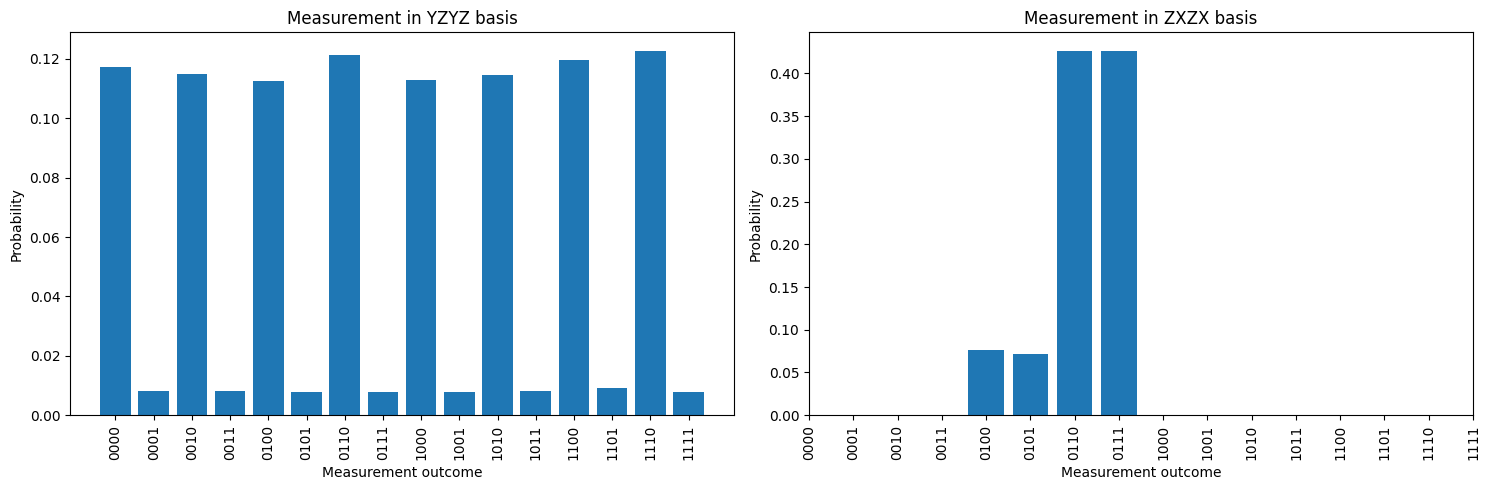

0: ───X───Z───X───@───────────X───Rx(0.167π)────────────────
                  │           │
1: ───S───X───────@───────────@───Ry(0.25π)─────────────────
                              │
2: ───H───────X───Y───×───@───@───@────────────Rz(0.333π)───
              │       │   │       │
3: ───X───T───@───X───×───X───────@────────────X────────────


In [73]:
#arbirary angles
theta_0 = np.pi/6
theta_1 = np.pi/4
theta_2 = np.pi/3
theta_3 = np.pi/3

#Form curcuit
qubits = [cirq.LineQubit(i) for i in range(4)]
circuit = cirq.Circuit()

#Step e functions
def measure_in_basis(circuit, basis_str):
    qubits = list(circuit.all_qubits())
    modified_circuit = circuit.copy()
    for qubit, basis in zip(reversed(qubits), basis_str):
        if basis == 'X':
            modified_circuit.append(cirq.H(qubit))
        elif basis == 'Y':
            modified_circuit.append(cirq.rx(-np.pi/2)(qubit))
    # Reverse qubit order for measurement
    modified_circuit.append(cirq.measure(*reversed(qubits), key='result'))
    return modified_circuit

def simulate_and_get_probabilities(circuit, basis, repetitions=8192):
    measured_circuit = measure_in_basis(circuit, basis)
    simulator = cirq.Simulator()
    result = simulator.run(measured_circuit, repetitions=repetitions)
    counts = result.histogram(key='result')
    total = sum(counts.values())
    probabilities = {k: v/total for k, v in counts.items()}
    return probabilities

def calculate_tvd(dist1, dist2):
    all_keys = set(dist1.keys()) | set(dist2.keys())
    return 0.5 * sum(abs(dist1.get(k, 0) - dist2.get(k, 0)) for k in all_keys)


#Append 20 gates
circuit.append(cirq.X(qubits[0]))
circuit.append(cirq.S(qubits[1]))
circuit.append(cirq.H(qubits[2]))
circuit.append(cirq.X(qubits[3]))
circuit.append(cirq.Z(qubits[0]))
circuit.append(cirq.X(qubits[1]))
circuit.append(cirq.T(qubits[3]))
circuit.append(cirq.X(qubits[0]))
circuit.append(cirq.CNOT(qubits[3], qubits[2]))
circuit.append(cirq.CZ(qubits[0], qubits[1]))
circuit.append(cirq.Y(qubits[2]))
circuit.append(cirq.X(qubits[3]))
circuit.append(cirq.SWAP(qubits[2], qubits[3]))
circuit.append(cirq.CNOT(qubits[2], qubits[3]))
circuit.append(cirq.CCNOT(qubits[2], qubits[1], qubits[0]))
circuit.append(cirq.CZ(qubits[2], qubits[3]))
circuit.append(cirq.Rx(rads=theta_0)(qubits[0]))
circuit.append(cirq.Ry(rads=theta_1)(qubits[1]))
circuit.append(cirq.Rz(rads=theta_2)(qubits[2]))
circuit.append(cirq.X(qubits[3]))

'''# Add inverses of the gates in reverse order
circuit.append(cirq.X(qubits[3]))  # Inverse of X
circuit.append(cirq.Rz(rads=-theta_2)(qubits[2]))  # Inverse of Rz
circuit.append(cirq.Ry(rads=-theta_1)(qubits[1]))  # Inverse of Ry
circuit.append(cirq.Rx(rads=-theta_0)(qubits[0]))  # Inverse of Rx
circuit.append(cirq.CZ(qubits[2], qubits[3]))  # Inverse of CZ
circuit.append(cirq.CCNOT(qubits[2], qubits[1], qubits[0]))  # Inverse of CCNOT
circuit.append(cirq.CNOT(qubits[2], qubits[3]))  # Inverse of CNOT
circuit.append(cirq.SWAP(qubits[2], qubits[3]))  # Inverse of SWAP
circuit.append(cirq.X(qubits[3]))  # Inverse of X
circuit.append(cirq.Y(qubits[2])**-1)  # Inverse of Y (Y dagger)
circuit.append(cirq.CZ(qubits[0], qubits[1]))  # Inverse of CZ
circuit.append(cirq.CNOT(qubits[3], qubits[2]))  # Inverse of CNOT
circuit.append(cirq.X(qubits[0]))  # Inverse of X
circuit.append(cirq.T(qubits[3])**-1)  # Inverse of T (T dagger)
circuit.append(cirq.X(qubits[1]))  # Inverse of X
circuit.append(cirq.Z(qubits[0])**-1)  # Inverse of Z (Z dagger)
circuit.append(cirq.X(qubits[3]))  # Inverse of X
circuit.append(cirq.H(qubits[2]))  # Inverse of H
circuit.append(cirq.S(qubits[1])**-1)  # Inverse of S (S dagger)
circuit.append(cirq.X(qubits[0]))  # Inverse of X'''

'''# Reverse qubit order for measurement
circuit.append(cirq.measure(*qubits[::-1], key='result'))

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=8192)

print("Results:")
print(result)

histogram = result.histogram(key='result')
# Analyze results
counts = Counter()
for outcome, freq in histogram.items():
    binary_outcome = f"{outcome:04b}"
    counts[binary_outcome] += freq

# Calculate conditional probabilities
conditional_probabilities = {}
for q2q1q0 in [f"{i:03b}" for i in range(8)]:
    total = sum(freq for outcome, freq in counts.items() if outcome[1:] == q2q1q0)
    if total > 0:
        prob_q3_0 = sum(freq for outcome, freq in counts.items() if outcome[1:] == q2q1q0 and outcome[0] == '0') / total
        conditional_probabilities[q2q1q0] = prob_q3_0
    else:
        conditional_probabilities[q2q1q0] = 0

# Display the calculated conditional probabilities
for q2q1q0, prob in conditional_probabilities.items():
    if prob == 0:
        print(f"P(q3=0|q2q1q0={q2q1q0}) = 0 (no occurrences of this combination)")
    else:
        print(f"P(q3=0|q2q1q0={q2q1q0}) = {prob:.4f}")

# Step 5: Show output histogram
plt.bar(histogram.keys(), histogram.values(), color='blue')
plt.xlabel("Measurement Outcomes (Binary Encoded)")
plt.ylabel("Frequency")
plt.title("Quantum Circuit Simulation Results (8192 shots)")
plt.xticks(rotation=90)
plt.show()

# Ensure all possible outcomes (0 to 15) are included in the histogram
all_outcomes = {i: 0 for i in range(16)}  # Initialize all outcomes with frequency 0
all_outcomes.update(histogram)  # Update with actual results from the simulation

# Plot histogram
plt.bar(all_outcomes.keys(), all_outcomes.values(), color='blue', width=0.5)
plt.xlabel("Measurement Outcomes (Binary Encoded)")
plt.ylabel("Frequency")
plt.title("Quantum Circuit Simulation Results (8192 shots)")
plt.xticks(ticks=range(16), labels=[f"{i:04b}" for i in range(16)], rotation=90)
plt.show()

# Print histogram for verification
print("Histogram with all outcomes:", all_outcomes)


# Display the calculated conditional probabilities
print(conditional_probabilities)'''

bases = ['XXXX', 'YYYY', 'ZZZZ', 'XYXY', 'XZXZ', 'YXYX', 'YZYZ', 'ZXZX', 'ZYZY']
probabilities = {basis: simulate_and_get_probabilities(circuit, basis) for basis in bases}

tvds = {}
for (basis1, basis2) in combinations(bases, 2):
    tvd = calculate_tvd(probabilities[basis1], probabilities[basis2])
    tvds[(basis1, basis2)] = tvd

max_tvd_pair = max(tvds, key=tvds.get)
max_tvd = tvds[max_tvd_pair]

print(f"Highest TVD: {max_tvd:.4f} between {max_tvd_pair[0]} and {max_tvd_pair[1]}")

# Plot histograms for the pair with highest TVD
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for ax, basis in zip((ax1, ax2), max_tvd_pair):
    ax.bar(probabilities[basis].keys(), probabilities[basis].values())
    ax.set_title(f'Measurement in {basis} basis')
    ax.set_xlabel('Measurement outcome')
    ax.set_ylabel('Probability')
    ax.set_xticks(range(16))
    ax.set_xticklabels([f'{i:04b}' for i in range(16)], rotation=90)

plt.tight_layout()
plt.show()

print(circuit)


# Congratulations
You've just run your first Cirq program.

To learn about running a circuit on a virtual machine that mimics existing quantum hardware, see [Quantum Virtual Machine](../simulate/quantum_virtual_machine.ipynb).

If you would like to learn more about quantum computing, check out our [education page](https://quantumai.google/resources). The Full API reference for Cirq can be found [here](/reference/python/cirq). If you are looking for vendor specific information that can be found on our vendor sub-pages:


  [Alpine Quantum Technologies](../hardware/aqt/getting_started.ipynb)
  
  [Pasqal](../hardware/pasqal/getting_started.ipynb)
  
  [IonQ](../hardware/ionq/getting_started.ipynb)
  
  [Azure](../hardware/azure-quantum/getting_started_honeywell.ipynb)
  
  [Rigetti](../hardware/rigetti/getting_started.ipynb)